In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

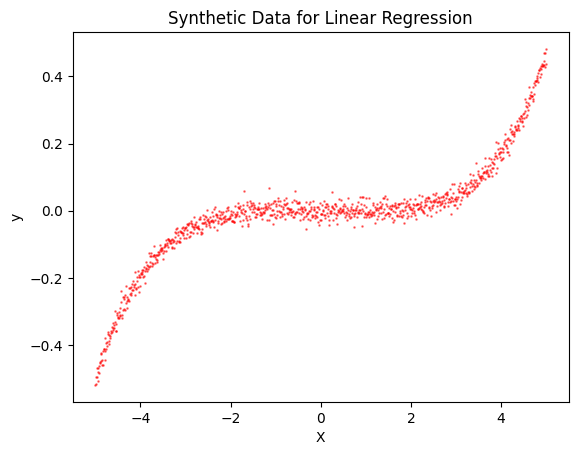

In [169]:
# Generate synthetic data for linear regression which follows 3-degree polynomial with some Gaussian noise
torch.manual_seed(0)
N = 1024
X = torch.linspace(-5, 5, N).unsqueeze(1)
y = 0.125 * X**5 + 1.5 * X**3 - 0.75 * X**2 - 2 * X + torch.randn(X.size()) * 20

# Rescale y_train to the range [-1, 1]
y = y / (y.max() - y.min())

# Plot the synthetic data
plt.scatter(X.numpy(), y.numpy(), marker='.', alpha=0.5, s=3, c='red')
plt.title('Synthetic Data for Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

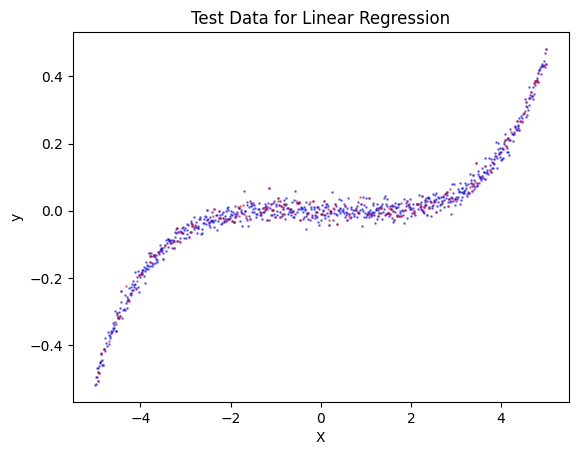

In [170]:
# Randomly Split data into training, and testing sets
train_size = int(0.8 * len(X))
train_indices = torch.randperm(len(X))[:train_size]
test_indices = torch.randperm(len(X))[train_size:]

X_train, y_train = X[train_indices], y[train_indices]
X_test, y_test = X[test_indices], y[test_indices]

# Plot the Train and Test data
plt.scatter(X_train.numpy(), y_train.numpy(), marker='.', alpha=0.5, s=3, c='blue')
plt.scatter(X_test.numpy(), y_test.numpy(), marker='.', alpha=0.5, s=3, c='red')
plt.title('Test Data for Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [171]:
# Define a simple Multi-Layer Perceptron (MLP) model for regression
class MLP(nn.Module):
    def __init__(self, input_size=1, hidden_units=5, output_size=1):
        super(MLP, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, hidden_units),
            nn.Tanh(),
            #nn.Linear(hidden_units, hidden_units),
            #nn.ReLU(),
            nn.Linear(hidden_units, output_size)
        )

    def forward(self, x):
        return self.model(x)

In [172]:
# Instantiate the model, loss function, and optimizer
model = MLP(hidden_units=3)
criterion = nn.MSELoss() # Mean Squared Error Loss
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [173]:
# Main training loop
num_epochs = 1500
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model on the training and testing sets
model.eval()
with torch.no_grad():
    train_preds = model(X_train)
    test_preds = model(X_test)
    train_loss = criterion(train_preds, y_train)
    test_loss = criterion(test_preds, y_test)
    print(f'Training Loss: {train_loss.item():.4f}, Testing Loss: {test_loss.item():.4f}')

Epoch [50/1500], Loss: 0.0050
Epoch [100/1500], Loss: 0.0028
Epoch [150/1500], Loss: 0.0021
Epoch [200/1500], Loss: 0.0015
Epoch [250/1500], Loss: 0.0011
Epoch [300/1500], Loss: 0.0009
Epoch [350/1500], Loss: 0.0007
Epoch [400/1500], Loss: 0.0006
Epoch [450/1500], Loss: 0.0006
Epoch [500/1500], Loss: 0.0005
Epoch [550/1500], Loss: 0.0005
Epoch [600/1500], Loss: 0.0005
Epoch [650/1500], Loss: 0.0004
Epoch [700/1500], Loss: 0.0004
Epoch [750/1500], Loss: 0.0004
Epoch [800/1500], Loss: 0.0004
Epoch [850/1500], Loss: 0.0004
Epoch [900/1500], Loss: 0.0004
Epoch [950/1500], Loss: 0.0004
Epoch [1000/1500], Loss: 0.0003
Epoch [1050/1500], Loss: 0.0003
Epoch [1100/1500], Loss: 0.0003
Epoch [1150/1500], Loss: 0.0003
Epoch [1200/1500], Loss: 0.0003
Epoch [1250/1500], Loss: 0.0003
Epoch [1300/1500], Loss: 0.0003
Epoch [1350/1500], Loss: 0.0003
Epoch [1400/1500], Loss: 0.0003
Epoch [1450/1500], Loss: 0.0003
Epoch [1500/1500], Loss: 0.0003
Training Loss: 0.0003, Testing Loss: 0.0003


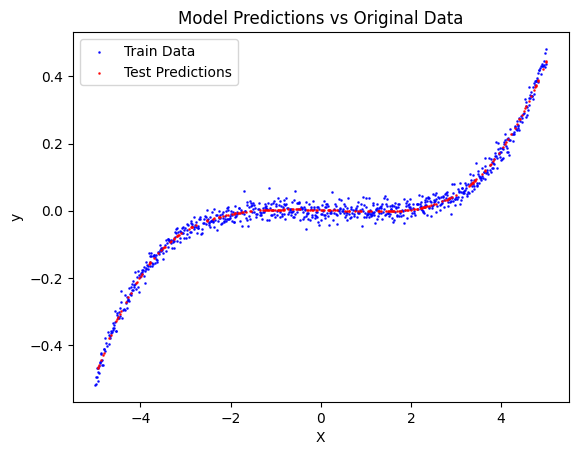

In [174]:
# Plot the Original Data vs Model Predictions
#plt.scatter(X.numpy(), y.numpy(), marker='.', alpha=0.5, s=3, c='red', label='Original Data')
plt.scatter(X_train.numpy(), y_train.numpy(), marker='.', alpha=0.85, s=3, c='blue', label='Train Data')
plt.scatter(X_test.numpy(), test_preds.numpy(), marker='.', alpha=0.85, s=3, c='red', label='Test Predictions')
plt.title('Model Predictions vs Original Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()